<a href="https://colab.research.google.com/github/bishwajit02/Pytorch-Tutorial-Youtube/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Neural Network using Iris Dataset**

In [55]:
import torch
import torch.nn as nn # nn stands for neural network
import torch.nn.functional as F
import numpy as np


In [56]:
class Model(nn.Module):
    def __init__(self, in_features=5, h1=1024, h2=2048, h3=1024, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.bn1 = nn.BatchNorm1d(h1)
        self.fc2 = nn.Linear(h1, h2)
        self.bn2 = nn.BatchNorm1d(h2)
        self.fc3 = nn.Linear(h2, h3)
        self.bn3 = nn.BatchNorm1d(h3)
        self.out = nn.Linear(h3, out_features)

        # Weight Initialization
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.out.weight)

    def forward(self, x):
        x = self.bn1(F.relu(self.fc1(x)))
        x = self.bn2(F.relu(self.fc2(x)))
        x = self.bn3(F.relu(self.fc3(x)))
        x = self.out(x)
        return x

In [57]:
# Pick a manual seed for randomization - helps with reproductibility
torch.manual_seed(42)

# Create an instance for the model

model = Model()

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
url = 'https://raw.githubusercontent.com/bishwajit02/Data/refs/heads/master/Dataset/p.csv'
df = pd.read_csv(url)
df

,target_name,target_classification,s_ra,s_dec,calib_level,t_min,t_exptime,classification_id
0,IC-3583,GALAXY-AMORPHOUS-IRREGULAR,189.182507,13.259203,3,56246.13574,820.0,0
1,IC-3583,GALAXY-AMORPHOUS-IRREGULAR,189.182507,13.259203,3,56254.12933,820.0,0
2,IC-3583,GALAXY-AMORPHOUS-IRREGULAR,189.182507,13.259203,3,56246.13574,1640.0,0
3,IC-3583,GALAXY-AMORPHOUS-IRREGULAR,189.182507,13.259203,3,56254.12109,1858.0,0
4,IC-3583,GALAXY-AMORPHOUS-IRREGULAR,189.182507,13.259203,3,56246.12750,1038.0,0
...,...,...,...,...,...,...,...,...
118,ANY,UNIDENTIFIED-PARALLEL-FIELD,189.236953,13.069358,3,58834.78650,3554.0,9
119,ANY,UNIDENTIFIED-PARALLEL-FIELD,189.236953,13.069358,3,58834.78650,3554.0,9
120,ANY,UNIDENTIFIED-PARALLEL-FIELD,189.237146,13.068893,3,58834.80327,3215.0,9
121,ANY,UNIDENTIFIED-PARALLEL-FIELD,189.237146,13.068893,3,58834.80327,3215.0,9


In [60]:
columns_to_drop = ['target_name', 'target_classification']
df = df.drop(columns=columns_to_drop)
df

,s_ra,s_dec,calib_level,t_min,t_exptime,classification_id
0,189.182507,13.259203,3,56246.13574,820.0,0
1,189.182507,13.259203,3,56254.12933,820.0,0
2,189.182507,13.259203,3,56246.13574,1640.0,0
3,189.182507,13.259203,3,56254.12109,1858.0,0
4,189.182507,13.259203,3,56246.12750,1038.0,0
...,...,...,...,...,...,...
118,189.236953,13.069358,3,58834.78650,3554.0,9
119,189.236953,13.069358,3,58834.78650,3554.0,9
120,189.237146,13.068893,3,58834.80327,3215.0,9
121,189.237146,13.068893,3,58834.80327,3215.0,9


In [61]:
# X y split

X = df.drop('classification_id', axis=1)
y = df['classification_id']


In [62]:
X = X.values
y = y.values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [66]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [67]:
epochs = 5000
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 1000 == 0:
    print(f"Epoch: {i} and Loss: {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 3.52329683303833
Epoch: 1000 and Loss: 0.05803820863366127
Epoch: 2000 and Loss: 0.000515989784616977
Epoch: 3000 and Loss: 8.721162157598883e-05
Epoch: 4000 and Loss: 3.829957131529227e-05


Text(0.5, 0, 'Epochs')

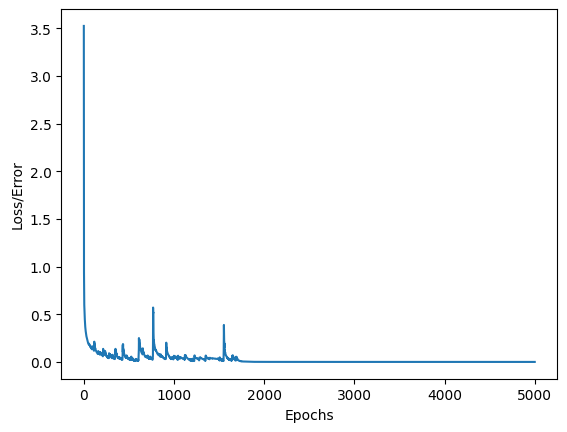

In [68]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epochs")

In [69]:
with torch.no_grad():
  y_eval = model.forward(X_test)

  loss = criterion(y_eval, y_test)

In [70]:
loss

tensor(0.7206)

In [73]:
from torch.utils.data import DataLoader, TensorDataset
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        predicted_classes = torch.argmax(y_pred, dim=1)
        correct += (predicted_classes == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 80.00%


In [74]:
# Store actual and predicted classification_ids
actual_class_ids = []
predicted_class_ids = []

# Evaluate Model
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        predicted_classes = torch.argmax(y_pred, dim=1)  # Get predicted indices

        actual_class_ids.extend(y_batch.numpy())         # Actual classification_id
        predicted_class_ids.extend(predicted_classes.numpy())  # Predicted classification_id

# Display Results
print(f"\n{'Sample':<8}{'Actual ID':<12}{'Predicted ID':<12}")
print("=" * 35)
for i in range(10):  # Show first 10 samples for better visualization
    print(f"{i+1:<8}{actual_class_ids[i]:<12}{predicted_class_ids[i]:<12}")



Sample  Actual ID   Predicted ID
1       2           5           
2       4           4           
3       5           5           
4       5           5           
5       0           0           
6       4           4           
7       5           5           
8       6           6           
9       4           4           
10      5           5           
